In [26]:
import pandas as pd
import numpy as np

option = pd.read_csv('option+crsp.csv')
print('Option Data From WRDS Options Suites')
display(option)
option['IV'] = 0.5*(option['iv_CATM']+option['iv_PATM'])
option['RI_Spread'] = option['hvol']-option['IV']
option['CP_Spread'] = option['iv_CATM']-option['iv_PATM']
option['Skew'] = option['iv_POTM']-option['iv_CATM']
option = option[['PERMNO', 'date', 'RI_Spread', 'CP_Spread', 'Skew']]

option['date'] = pd.to_datetime(option['date'])
option['year_month'] = option['date'].dt.to_period('M')

print('-'*50)
print('Cleaned Option Data')
display(option)

result = option.groupby(['year_month', 'PERMNO'])[['RI_Spread', 'CP_Spread', 'Skew']].mean()
result = result.dropna().reset_index()
result['year_month']+=1

print('-'*50)
print('Aggregated Option Data')
display(result)

result.to_csv('option_variables.csv', index=False)
print('Option Data Saved to option_variables.csv')

Option Data From WRDS Options Suites


,PERMNO,secid,date,iv_CATM,nopt_CATM,iv_PATM,nopt_PATM,iv_POTM,nopt_POTM,Skew_OTM,Parity_VSpread,nopt_Parity,PC_Ratio,hvol,mdate,wdate
0,10001,104332,2014-04-10,0.565428,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098384,2014-04-30,2014-04-12
1,10001,104332,2014-04-11,0.603154,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102421,2014-04-30,2014-04-12
2,10001,104332,2014-04-14,0.153606,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.122146,2014-04-30,2014-04-19
3,10001,104332,2014-04-15,0.198708,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.120596,2014-04-30,2014-04-19
4,10001,104332,2014-04-16,0.206301,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.122011,2014-04-30,2014-04-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8804499,93436,143439,2022-12-23,0.815424,6.0,0.817229,6.0,0.857445,9.0,0.042021,-0.010236,97.0,0.9542,0.612121,2022-12-31,2022-12-24
8804500,93436,143439,2022-12-27,0.894595,5.0,0.914751,6.0,0.957604,6.0,0.063009,-0.052885,98.0,0.9959,0.702965,2022-12-31,2022-12-31
8804501,93436,143439,2022-12-28,0.879448,4.0,0.879625,4.0,0.925200,4.0,0.045752,-0.037925,79.0,0.9855,0.725851,2022-12-31,2022-12-31
8804502,93436,143439,2022-12-29,0.826937,4.0,0.836782,4.0,0.875170,6.0,0.048233,-0.032095,81.0,1.0097,0.805223,2022-12-31,2022-12-31


--------------------------------------------------
Cleaned Option Data


,PERMNO,date,RI_Spread,CP_Spread,Skew,year_month
0,10001,2014-04-10,NaN,NaN,NaN,2014-04
1,10001,2014-04-11,NaN,NaN,NaN,2014-04
2,10001,2014-04-14,NaN,NaN,NaN,2014-04
3,10001,2014-04-15,NaN,NaN,NaN,2014-04
4,10001,2014-04-16,NaN,NaN,NaN,2014-04
...,...,...,...,...,...,...
8804499,93436,2022-12-23,-0.204205,-0.001805,0.042021,2022-12
8804500,93436,2022-12-27,-0.201708,-0.020156,0.063009,2022-12
8804501,93436,2022-12-28,-0.153685,-0.000177,0.045752,2022-12
8804502,93436,2022-12-29,-0.026636,-0.009845,0.048233,2022-12


--------------------------------------------------
Aggregated Option Data


,year_month,PERMNO,RI_Spread,CP_Spread,Skew
0,1996-02,10078,0.144319,0.002684,0.005677
1,1996-02,10104,0.126637,-0.003858,0.044311
2,1996-02,10107,0.119546,-0.002361,0.019742
3,1996-02,10138,0.033517,-0.009984,-0.012645
4,1996-02,10145,0.079896,0.000718,0.014966
...,...,...,...,...,...
428919,2023-01,93356,0.117635,0.005960,0.030534
428920,2023-01,93374,0.086463,-0.058625,0.054865
428921,2023-01,93423,0.024184,-0.000071,0.041017
428922,2023-01,93429,0.010246,-0.010348,0.064517


Option Data Saved to option_variables.csv


<Axes: xlabel='year_month'>

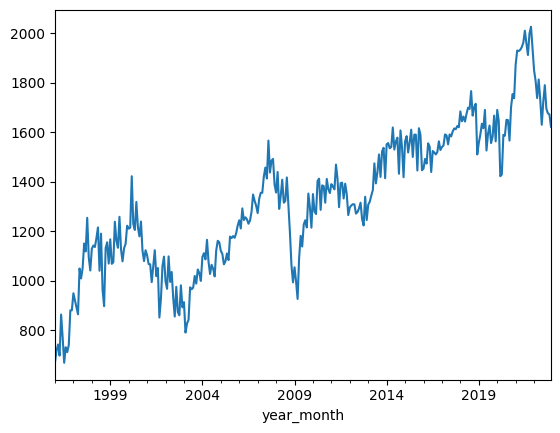

In [20]:
result.groupby('year_month').apply(lambda x: x['PERMNO'].nunique()).plot()